# Выделение групп пользователей на основе поведения в мобильном приложении "Ненужные вещи"

<div class="alert alert-info"> <b></b> 
    
ПРЕЗЕНТАЦИЯ: (https://drive.google.com/file/d/1d5mtaRcfQoY1QtaSBeXyS4QyB9xUAtn6/view?usp=sharing)
    
ДАШБОРД: 
           (https://public.tableau.com/app/profile/vika.alekseeva/viz/_16883893186820/sheet2)  
</div>

***ЦЕЛЬ ИССЛЕДОВАНИЯ:*** 

Отследить зависимости в поведении разных групп пользователей в мобильном приложении с целью увеличения показателей выручки.

***ОПИСАНИЕ ДАННЫХ:***

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.
В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет mobile_dataset.csv содержит колонки: 

event.time — время совершения

event.name — название события

user.id — идентификатор пользователя

Датасет mobile_sources.csv содержит колонки:

userId — идентификатор пользователя

source — источник, с которого пользователь установил приложение

Расшифровки событий:

advert_open — открытие карточки объявления

photos_show — просмотр фотографий в объявлении

tips_show — пользователь увидел рекомендованные объявления

tips_click — пользователь кликнул по рекомендованному объявлению

contacts_show и show_contacts  — пользователь нажал на кнопку "посмотреть номер
телефона" на карточке объявления

contacts_call — пользователь позвонил по номеру телефона на карточке
объявления

map — пользователь открыл карту размещенных объявлений

search_1 — search_7 — разные события, связанные с поиском по сайту

favorites_add — добавление объявления в избранное

# ДЕКОМПОЗИЦИЯ

***1. ЗАГРУЗКА ДАННЫХ***

***2. ПРЕДОБРАБОТКА ДАННЫХ***

2.1 Работа с пропусками

2.2 Проверка дубликатов

2.3 Работа с типами данных 

2.5 Обработка выбросов (принято решение ограничивать выбросы срезами по ходу исследования)

***3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ***

3.1 Рассчитать Retention Rate

3.2 Рассчитать время нахождения в приложении (сессии)

3.3 Рассчитать частоту совершения событий

3.4 Рассчитать конверсию в целевое действие (show_contacts)

***4. СЕГМЕНТАЦИЯ ПОЛЬЗОВАТЕЛЕЙ НА ОСНОВЕ ДЕЙСТВИЙ (на выбор по одному признаку)***

4.1 Пользователи какой группы склонны часто возвращаться в мобильное приложение? Рассчитать Retention rate.

4.2 Пользователи какой группы часто делают целевое событие (show_contacts)? Рассчитать конверсию в целевое действие.

***5. ПРОВЕРКА СТАТИСТИЧЕСКИХ ГИПОТЕЗ***

5.1 Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

5.2 Сформулируйте собственную гипотезу. Дополните её нулевой и альтернативной гипотезами. Проведите статистический тест.

***Нулевая гипотеза: Пользователи, установившие приложение в будние и выходные дни демонстрируют разную конверсию в просмотры контактов.***

***Альтерантивная гипотеза: Конверсия в обеих группах (будние и выходные дни) не имеет статистической разницы.***

***6. ИТОГОВЫЙ ВЫВОД И РЕКОМЕНДАЦИИ***

***ОСНОВНОЙ ПРОЕКТ***

***1. ЗАГРУЗКА ДАННЫХ***

In [67]:
import pandas as pd   #импортируем библиотеки
import datetime as dt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
from plotly import graph_objects as go
plt.style.use ('seaborn-deep')
import plotly.express as px
from numpy import median
from numpy import mean
 
register_matplotlib_converters()
from folium import Map, Choropleth, Marker
import json
from folium.plugins import MarkerCluster

In [68]:
try:
    mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
    mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
except: 
    print("Ошибка в исходных файлах")

***2. ПРЕДОБРАБОТКА ДАННЫХ***

2.1 Работа с пропусками

2.2 Проверка дубликатов

In [69]:
def show_info(df): #функция для отображения информации по датасету, поиск дубликатов, пропусков, вывод первых 10 строк датасета
    print(df.info())
    print ('В таблице' , df.duplicated().sum(), 'дубликатов')
    print ('В столбцах:', df.isna().sum(), 'пропусков')
    display(df.head(10))

In [70]:
show_info(mobile_sourсes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
None
В таблице 0 дубликатов
В столбцах: userId    0
source    0
dtype: int64 пропусков


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
5,17f6b2db-2964-4d11-89d8-7e38d2cb4750,yandex
6,62aa104f-592d-4ccb-8226-2ba0e719ded5,yandex
7,57321726-5d66-4d51-84f4-c797c35dcf2b,google
8,c2cf55c0-95f7-4269-896c-931d14deaab5,google
9,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,yandex


In [71]:
show_info(mobile_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None
В таблице 0 дубликатов
В столбцах: event.time    0
event.name    0
user.id       0
dtype: int64 пропусков


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894


***ВЫВОД: В датасетах отсутвуют дубликаты и пропуски.***

2.3 Работа с типами данных 

In [72]:
mobile_dataset['event.time'] = pd.to_datetime(mobile_dataset['event.time']) # измение типа данных

***ВЫВОД: В столбце с датой и временем изменили тип данных на необходимый, остальные типы данных соответствуют.***

2.4 Приведение данных к единому виду (переименовать столбцы, обработка категоральных данных)

In [73]:
mobile_dataset = mobile_dataset.rename (columns={'event.time': 'event_time','event.name': 'event_name', 'user.id':'userId'}) #переименовали столбцы

In [74]:
mobile_dataset['event_name'].unique() #проверили уникальные значения столбца event_name

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

In [75]:
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('show_contacts','contacts_show') #заменим show_contacts на contacts_show 

In [76]:
mobile_dataset.groupby('event_name')['userId'].agg('count') #проверили данные по столбцу event_name

event_name
advert_open       6164
contacts_call      541
contacts_show     4529
favorites_add     1417
map               3881
photos_show      10012
search_1          3506
search_2           324
search_3           522
search_4           701
search_5          1049
search_6           460
search_7           222
tips_click         814
tips_show        40055
Name: userId, dtype: int64

2.5 Обработка выбросов (принято решение ограничивать выбросы срезами по ходу исследования)

***3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ***

3.1 Рассчитать Retention Rate

***СОЗДАДИМ ФУНКЦИИ: получения профилей и Retention***

In [77]:
def get_profiles(sessions):
    profiles = (
        sessions.sort_values(by=['userId', 'event_time'])
        .groupby('userId')
        .agg(
            {
                'event_time': 'first',
        
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt'])
        .agg({'userId': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'userId': 'unique_users'})
        .reset_index()  # возвращаем dt из индексов
    )
    return profiles  # возвращаем профили 

In [78]:
profiles = get_profiles(mobile_dataset)
profiles

,userId,first_ts,dt,month
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,2019-10-01
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,2019-10-19,2019-10-01
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,2019-11-01,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,2019-10-18,2019-10-01
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,2019-10-25,2019-10-01
...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27.414960,2019-10-13,2019-10-01
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49.997044,2019-10-07,2019-10-01
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35.199237,2019-10-23,2019-10-01
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33.867145,2019-10-21,2019-10-01


In [79]:
def get_retention(
    profiles, sessions, observation_date, horizon_days, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['userId', 'event_time']], on='userId', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='userId', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'userId': 'nunique'})
        .rename(columns={'userId': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

In [80]:
# импортируем функции для работы со временем
from datetime import datetime, timedelta

# задаём момент и горизонт анализа данных
observation_date = datetime(2019, 11, 3).date() # максимальная дата выгрузки
horizon_days = 14  #установим горизонт анализа две недели (14 дней) 

# создаём опцию «игнорировать горизонт»
ignore_horizon = False

In [81]:
retention_raw, retention = get_retention(
    profiles, mobile_dataset, datetime(2019,11,3).date(), 14
)

retention #находим retention rate

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
dt,,,,,,,,,,,,,,,
2019-10-07,204,1.0,0.122549,0.098039,0.107843,0.053922,0.039216,0.058824,0.078431,0.053922,0.049020,0.049020,0.034314,0.024510,0.058824
2019-10-08,167,1.0,0.161677,0.125749,0.053892,0.041916,0.065868,0.053892,0.071856,0.059880,0.041916,0.059880,0.023952,0.029940,0.035928
2019-10-09,176,1.0,0.073864,0.062500,0.056818,0.068182,0.068182,0.056818,0.073864,0.062500,0.034091,0.022727,0.028409,0.034091,0.056818
2019-10-10,174,1.0,0.091954,0.103448,0.080460,0.097701,0.080460,0.068966,0.051724,0.080460,0.034483,0.034483,0.051724,0.045977,0.040230
2019-10-11,136,1.0,0.088235,0.117647,0.095588,0.088235,0.073529,0.073529,0.044118,0.014706,0.044118,0.036765,0.036765,0.051471,0.036765
2019-10-12,125,1.0,0.128000,0.160000,0.056000,0.064000,0.088000,0.080000,0.088000,0.080000,0.064000,0.064000,0.040000,0.072000,0.048000
2019-10-13,148,1.0,0.128378,0.067568,0.054054,0.067568,0.054054,0.054054,0.047297,0.047297,0.047297,0.040541,0.040541,0.047297,0.047297
2019-10-14,185,1.0,0.113514,0.102703,0.102703,0.081081,0.070270,0.054054,0.043243,0.075676,0.037838,0.037838,0.048649,0.016216,0.064865
2019-10-15,186,1.0,0.139785,0.091398,0.080645,0.053763,0.053763,0.080645,0.075269,0.064516,0.021505,0.037634,0.037634,0.032258,0.037634


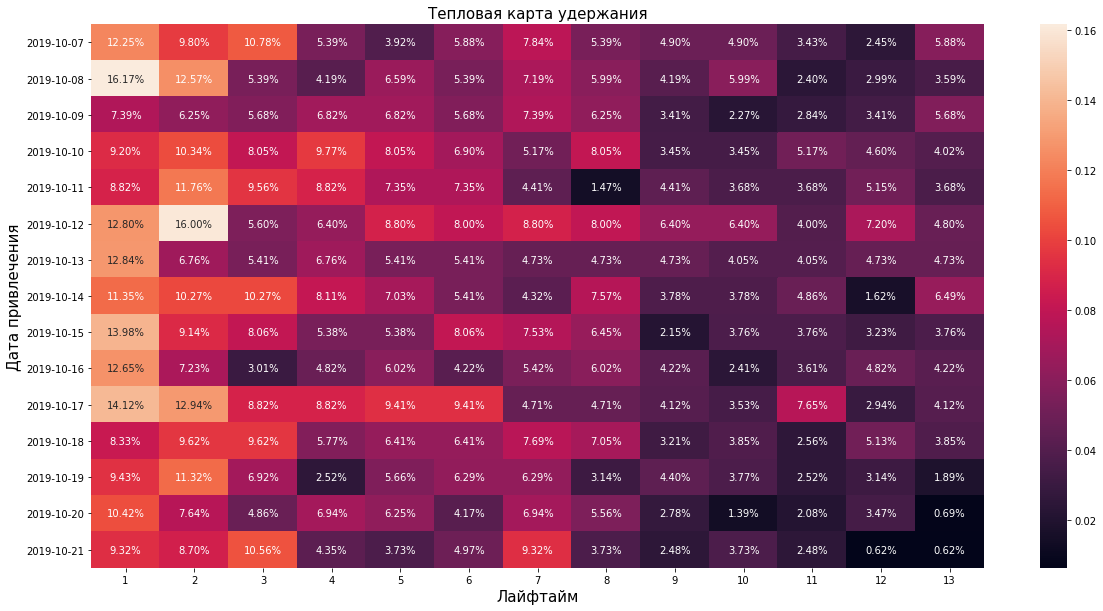

In [82]:
plt.figure(figsize=(20, 10))  # задаём размер графика
sns.heatmap(retention.drop(columns = [0, 'cohort_size']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.xlabel('Лайфтайм', size=15)
plt.ylabel('Дата привлечения', size=15)
plt.title('Тепловая карта удержания', size = 15)  # название графика
plt.show() 

***ВЫВОД: Наибольший и длительный % возврата демонстрируют пользователи привлеченные 2019-10-08 и 2019-10-12. Также стоит отметить, что на 7 лайфтайм % RR у пользователей привлеченых 2019-10-21 и 2019-10-12 самый высокий. % возврата пользователей начинает снижаться с 8 лайфтайма.***

3.2 Рассчитать время нахождения в приложении (сессии)

In [83]:
sessions = mobile_dataset.sort_values(['userId','event_time'])
sessions

,event_time,event_name,userId
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b


In [84]:
t = (sessions.groupby('userId')['event_time'].diff() > pd.Timedelta('5Min')).cumsum()
sessions['session_id'] = sessions.groupby(['userId', t], sort=False).ngroup() + 1

In [85]:
mobile_dataset = sessions
mobile_dataset

,event_time,event_name,userId,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
...,...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16365
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16365
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16366
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16366


In [86]:
mobile_dataset_avg = mobile_dataset.groupby('session_id')['event_time'].agg('max') - mobile_dataset.groupby('session_id')['event_time'].agg('min')
mobile_dataset_avg = mobile_dataset_avg.sort_values().to_frame().reset_index()
mobile_dataset_avg#найдем длительность сессий

,session_id,event_time
0,8183,0 days 00:00:00
1,10492,0 days 00:00:00
2,4293,0 days 00:00:00
3,10493,0 days 00:00:00
4,10494,0 days 00:00:00
...,...,...
16361,6699,0 days 01:19:44.109857
16362,8187,0 days 01:27:56.309836
16363,4631,0 days 01:35:26.474474
16364,12195,0 days 01:40:00.992615


***ВЫВОД: Было принято решение взять за одну сессию интервал в 5 минут, как наиболее безопасный интервал.По дефолту во всяких гугл аналитика, Яндекс метрика тайм аут сессии 30 мин. Зависит от степени конфиденциальности приложения,чем меньше, тем безопаснее***

In [87]:
mobile_dataset_avg.describe() #посмотрим на выбросы

,session_id,event_time
count,16366.000000,16366
mean,8183.500000,0 days 00:04:15.473311926
std,4724.601588,0 days 00:06:57.697522347
min,1.000000,0 days 00:00:00
25%,4092.250000,0 days 00:00:00
50%,8183.500000,0 days 00:01:36.690971
75%,12274.750000,0 days 00:05:37.067660
max,16366.000000,0 days 01:58:56.369648


In [88]:
mobile_dataset_null = mobile_dataset_avg.query('event_time == "0 days 00:00:00"')
mobile_dataset_null # рассмотрим более детальнонулевые сессии

,session_id,event_time
0,8183,0 days
1,10492,0 days
2,4293,0 days
3,10493,0 days
4,10494,0 days
...,...,...
5216,327,0 days
5217,13188,0 days
5218,2363,0 days
5219,2338,0 days


In [89]:
null_session = mobile_dataset_null['session_id'].to_list()
sorted (null_session) #выделим список session_id с нулевой длительностью

[8,
 13,
 21,
 22,
 27,
 28,
 29,
 30,
 36,
 37,
 41,
 51,
 52,
 60,
 61,
 62,
 63,
 66,
 73,
 74,
 78,
 80,
 81,
 82,
 84,
 85,
 86,
 88,
 89,
 95,
 96,
 103,
 113,
 120,
 122,
 125,
 129,
 132,
 133,
 135,
 137,
 138,
 139,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 153,
 154,
 161,
 163,
 166,
 168,
 173,
 174,
 177,
 188,
 189,
 192,
 193,
 200,
 201,
 202,
 209,
 210,
 211,
 212,
 219,
 223,
 228,
 229,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 244,
 248,
 255,
 267,
 271,
 279,
 284,
 292,
 302,
 313,
 316,
 319,
 322,
 323,
 327,
 328,
 336,
 346,
 361,
 363,
 367,
 370,
 379,
 394,
 395,
 400,
 402,
 406,
 412,
 414,
 415,
 416,
 417,
 418,
 421,
 423,
 425,
 431,
 432,
 434,
 437,
 443,
 444,
 446,
 447,
 451,
 452,
 453,
 454,
 456,
 460,
 466,
 471,
 477,
 483,
 484,
 486,
 487,
 489,
 491,
 498,
 499,
 501,
 502,
 503,
 504,
 506,
 507,
 509,
 510,
 511,
 514,
 515,
 522,
 526,
 535,
 539,
 540,
 541,
 543,
 546,
 547,
 549,
 555,
 559,
 560,
 561,


In [90]:
null_name = mobile_dataset.query('session_id == @null_session')
null_name #добавим название события к нулевым сессиям

,event_time,event_name,userId,session_id
33482,2019-10-20 18:49:24.115634,search_1,00157779-810c-4498-9e05-a1e9e3cedf93,8
33601,2019-10-20 19:57:15.652784,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,13
61336,2019-10-30 08:26:53.933176,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,21
72809,2019-11-03 17:12:09.708771,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,22
48631,2019-10-25 22:17:31.839852,search_7,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,27
...,...,...,...,...
25778,2019-10-17 15:34:19.450186,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16328
61768,2019-10-30 11:31:45.886946,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16357
69525,2019-11-02 01:16:48.947231,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16359
70585,2019-11-02 18:01:27.094834,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16360


In [91]:
null_name.groupby('event_name')['session_id'].agg('nunique')#выведем названия и количество нулевых сессий

event_name
advert_open       114
contacts_call       1
contacts_show     385
favorites_add      99
map               254
photos_show      1098
search_1          643
search_3           15
search_4            8
search_5           45
search_6            1
search_7            5
tips_click         37
tips_show        2516
Name: session_id, dtype: int64

***ВЫВОД: Наибольшее количество нулевых сессии tips_show 2 516 (показать подсказку).***

In [92]:
mobile_dataset_avg = mobile_dataset_avg.query('event_time >= "0 days 00:00:30"and event_time <= "0 days 00:30:00"')
mobile_dataset_avg #удалим выбросы (нулевую, крайне малую длительность и длительность сессий свыше 30 минут)

,session_id,event_time
6541,15411,0 days 00:00:30.049948
6542,2826,0 days 00:00:30.092524
6543,5684,0 days 00:00:30.116302
6544,5688,0 days 00:00:30.120171
6545,8412,0 days 00:00:30.245684
...,...,...
16150,5295,0 days 00:29:49.599939
16151,2972,0 days 00:29:51.469493
16152,75,0 days 00:29:55.959226
16153,10302,0 days 00:29:57.400456


In [93]:
mobile_dataset_avg.describe()

,session_id,event_time
count,9614.000000,9614
mean,8209.896297,0 days 00:06:18.239127718
std,4735.220734,0 days 00:05:37.681245193
min,1.000000,0 days 00:00:30.049948
25%,4099.250000,0 days 00:02:14.613138500
50%,8267.000000,0 days 00:04:31.413739
75%,12345.750000,0 days 00:08:30.895350500
max,16366.000000,0 days 00:29:59.442878


In [94]:
print('Среднее время сессии составляет:', mobile_dataset_avg['event_time'].mean()) #среднее время сессии

Среднее время сессии составляет: 0 days 00:06:18.239127718


***ВЫВОД: Исключили из датасета сесии с очень малой продолжительностью до 30 секунд и нулевые сессии, а также сессии крайне продолжительные от получаса. Среднее время сессии составило 6 минуты 18 секунд. Наибольшее количество нулевых сессии tips_show 2 516 (показать подсказку), для аналитики исключим из исследования этот тип событий, не всегда пользователи пользуются подсказками и это действительно не является программным сбоем.***

3.3 Рассчитать частоту совершения событий

In [95]:
mobile_dataset['duration'] = mobile_dataset.groupby('session_id')['event_time'].agg('max') - mobile_dataset.groupby('session_id')['event_time'].agg('min')
mobile_dataset # найдем длительность сессии

,event_time,event_name,userId,session_id,duration
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:18.837507
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:06:53.148759
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:00:00
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:28.750679
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:31.768081
...,...,...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16365,NaT
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16365,NaT
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16366,NaT
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16366,NaT


In [96]:
new_data = mobile_dataset.query('duration >="0 days 00:00:30" and duration <="0 days 00:30:00"')
new_data #убрали выбросы 

,event_time,event_name,userId,session_id,duration
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:18.837507
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:06:53.148759
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:28.750679
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:31.768081
839,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:00:43.111827
...,...,...,...,...,...
11383,2019-10-12 01:07:11.782372,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:02:50.690941
11384,2019-10-12 01:07:53.959366,map,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:01:45.075992
11385,2019-10-12 01:08:03.825098,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:05:57.907389
11387,2019-10-12 01:08:49.357548,map,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:03:45.934813


In [97]:
data = new_data.groupby('session_id')['event_name'].agg('count')
print ('Средняя частота совершения событий в сессии составляет:' , data.mean().round (2))

Средняя частота совершения событий в сессии составляет: 3.59


3.4 Рассчитать конверсию в целевое действие (show_contacts)

In [98]:
conversion = new_data.query('event_name == "contacts_show"')['userId'].nunique()/new_data.userId.nunique()
print('Конверсия в целевое действие составляет:', conversion * 100, '%')

Конверсия в целевое действие составляет: 15.931593159315932 %


***ВЫВОД:Конверсия в целевое действие составила порядка 15,9 %, что говорит о высоком уровне конверсии.***

In [99]:
new_data['hour'] = pd.DatetimeIndex(new_data['event_time']).hour
new_data

/tmp/ipykernel_125/2223867318.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,event_time,event_name,userId,session_id,duration,hour
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:18.837507,13
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:06:53.148759,13
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:28.750679,13
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:31.768081,13
839,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:00:43.111827,13
...,...,...,...,...,...,...
11383,2019-10-12 01:07:11.782372,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:02:50.690941,1
11384,2019-10-12 01:07:53.959366,map,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:01:45.075992,1
11385,2019-10-12 01:08:03.825098,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:05:57.907389,1
11387,2019-10-12 01:08:49.357548,map,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:03:45.934813,1


In [100]:
viz = new_data.groupby('hour')['session_id'].agg('nunique').to_frame().reset_index()
viz

,hour,session_id
0,0,70
1,1,29
2,2,20
3,3,17
4,4,9
5,5,4
6,6,18
7,7,20
8,8,66
9,9,133


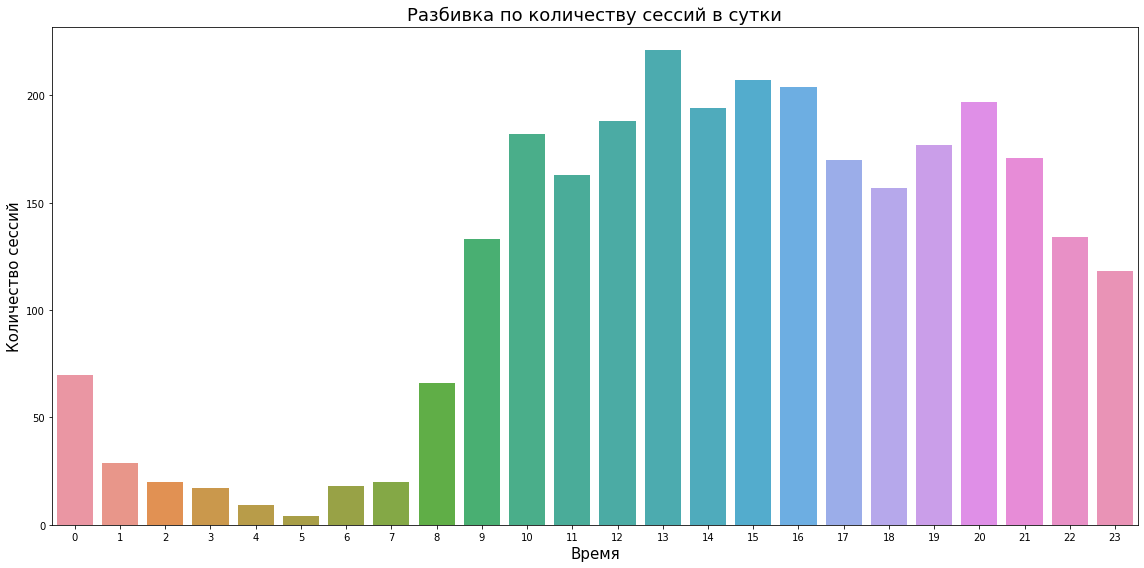

In [101]:
plt.figure(figsize=(16,8)) #построим столбчатую диаграмму

ax = sns.barplot(x='hour', 
           y='session_id', 
           data=viz)


plt.xlabel('Время', size=15)
plt.ylabel('Количество сессий', size=15)
plt.title('Разбивка по количеству сессий в сутки', size=18)
plt.tight_layout()

***ВЫВОД:  Наибольшее количество сессий наблюдается в период с 10, 13 и 20-22, смею предположить, что именно в это время (дорога на рабту, обед и дорога домой) по этой причине наблюдается повышенная активность сессий, наименьшая активность ночью (время сна), рост количества сессий наблюдается с 8 утра время пробуждения.***

 ***ВЫВОД:***

Наибольший и длительный % возврата демонстрируют пользователи привлеченные 2019-10-12 и 2019-10-17. Также стоит отметить, что на 7 лайфтайм % RR у пользователей привлеченых 2019-10-21 и 2019-10-12 самый высокий. % возврата пользователей начинает снижаться с 8 лайфтайма.

Среднее время сессии (за сессию было принято взять продолжительность 5 минут) составило 6 минут 18 секунд, в ходе исследования было установлено, что большая часть нулевых сессий относится к типу события tips_show (показать подсказку), что не всегда является актуальным для пользователя. Из исследования были исключены сессии менее 30 секунд и очень длительные сессии более 30 минут.

Конверсия в целевое действие (contacts_show просмотр контактов) составила порядка 15,9 %, что говорит о высоком уровне конверсии пользователей.

Наибольшее количество сессий наблюдается в период с 10, 13 и 19-20, смею предположить, что именно в это время (дорога на работу, обед и дорога домой) по этой причине наблюдается повышенная активность сессий, наименьшая активность ночью (время сна), рост количества сессий наблюдается с 7-8 утра время пробуждения.

***4. СЕГМЕНТАЦИЯ ПОЛЬЗОВАТЕЛЕЙ НА ОСНОВЕ ДЕЙСТВИЙ (на выбор по одному признаку)***

4.1 Пользователи какой группы склонны часто возвращаться в мобильное приложение? Рассчитать Retention rate.

***РАССМОТРИМ ПОЛЬЗОВАТЕЛЕЙ В РАЗРЕЗЕ ИСТОЧНИКА ПРИВЛЕЧЕНИЯ YANDEX/GOOGLE/OTHER***

Было принято решение рассмотрения пользователей в разрезе групп привлечения (источник) для дальнейшей аналитики рекламной кампании (откуда приходят более качественные пользователи), усовершенствования источника привлечения или отказа от какого-то источника в пользу наиболее качественного.

In [102]:
source_user = new_data.merge(mobile_sourсes, on = 'userId', how = 'left')
source_user # объединим два датасета с источником привлечения 

,event_time,event_name,userId,session_id,duration,hour,source
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:18.837507,13,other
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:06:53.148759,13,other
2,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:28.750679,13,other
3,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:01:31.768081,13,other
4,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:00:43.111827,13,other
...,...,...,...,...,...,...,...
9609,2019-10-12 01:07:11.782372,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:02:50.690941,1,google
9610,2019-10-12 01:07:53.959366,map,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:01:45.075992,1,google
9611,2019-10-12 01:08:03.825098,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:05:57.907389,1,google
9612,2019-10-12 01:08:49.357548,map,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,16317,0 days 00:03:45.934813,1,google


In [103]:
pie = source_user.groupby('source')['userId'].agg('nunique').to_frame().reset_index()
pie

,source,userId
0,google,280
1,other,300
2,yandex,531


In [104]:
source = ['google', 'other','yandex']
values = [461,493,794]

fig = go.Figure(data=[go.Pie(labels=source, values=values)], layout_title_text='Распределние пользователей по источникам')

fig.show() 

***ВЫВОД: Наибольший процент пользователей установившие приложение из источника Яндекс (почти половина пользователей), из источника Google и other распределение более равномерное по 26% и 28%.***

In [105]:
a = source_user.query('source == "yandex"')
a #пользователи из источника Яндекс

,event_time,event_name,userId,session_id,duration,hour,source
7,2019-10-11 11:22:54.442841,contacts_show,005fbea5-2678-406f-88a6-fbe9787e2268,44,0 days 00:02:50.674242,11,yandex
8,2019-10-11 11:23:00.152471,contacts_show,005fbea5-2678-406f-88a6-fbe9787e2268,44,0 days 00:07:14.442770,11,yandex
9,2019-10-11 11:23:11.379247,contacts_show,005fbea5-2678-406f-88a6-fbe9787e2268,44,0 days 00:05:05.122843,11,yandex
10,2019-10-11 11:29:10.270892,tips_show,005fbea5-2678-406f-88a6-fbe9787e2268,45,0 days 00:05:55.060398,11,yandex
11,2019-10-08 21:26:09.242929,photos_show,006a32d4-ee10-40dc-b237-11e0fde81cbc,47,0 days 00:06:45.314315,21,yandex
...,...,...,...,...,...,...,...
9599,2019-10-13 16:40:50.453911,tips_show,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,16305,0 days 00:04:44.501016,16,yandex
9600,2019-10-07 20:32:49.997044,photos_show,ffc01466-fdb1-4460-ae94-e800f52eb136,16309,0 days 00:03:53.219300,20,yandex
9601,2019-10-07 20:32:50.117161,photos_show,ffc01466-fdb1-4460-ae94-e800f52eb136,16309,0 days 00:23:05.501478,20,yandex
9602,2019-10-07 20:33:03.056037,photos_show,ffc01466-fdb1-4460-ae94-e800f52eb136,16309,0 days 00:13:05.534628,20,yandex


In [106]:
retention_raw, retention_a = get_retention(
    profiles, a, datetime(2019,10,18).date(), 7
)

retention_a

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0
dt,,,,,,,,
2019-10-07,204,0.426471,0.073529,0.039216,0.068627,0.029412,0.014706,0.014706
2019-10-08,167,0.419162,0.059880,0.047904,0.017964,0.017964,0.011976,0.000000
2019-10-09,176,0.437500,0.039773,0.034091,0.017045,0.000000,0.000000,0.000000
2019-10-10,174,0.448276,0.034483,0.045977,0.040230,0.005747,0.000000,0.000000
2019-10-11,136,0.463235,0.044118,0.036765,0.000000,0.000000,0.000000,0.000000
2019-10-12,125,0.464000,0.056000,0.000000,0.000000,0.000000,0.000000,0.000000


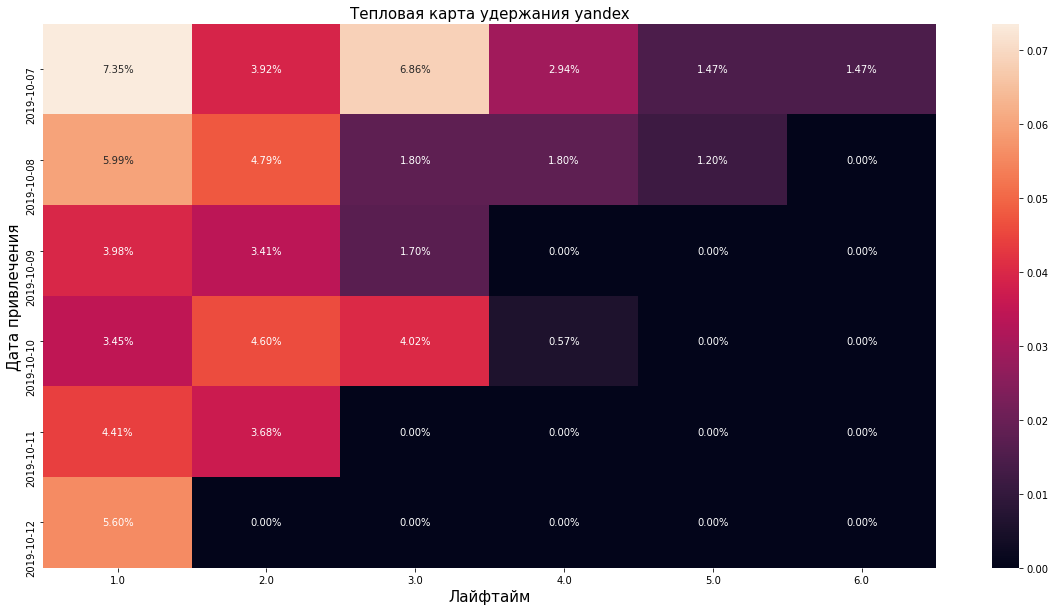

In [107]:
plt.figure(figsize=(20, 10))  # задаём размер графика
sns.heatmap(retention_a.drop(columns = [0, 'cohort_size']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.xlabel('Лайфтайм', size=15)
plt.ylabel('Дата привлечения', size=15)
plt.title('Тепловая карта удержания yandex', size=15)  # название графика
plt.show() 

In [108]:
b = source_user.query('source == "google"')

In [109]:
retention_raw_b, retention_b = get_retention(
    profiles, b, datetime(2019,10,18).date(), 7
)

retention_b

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0
dt,,,,,,,,
2019-10-07,204,0.254902,0.019608,0.014706,0.024510,0.009804,0.004902,0.009804
2019-10-08,167,0.239521,0.053892,0.035928,0.011976,0.005988,0.000000,0.000000
2019-10-09,176,0.238636,0.005682,0.011364,0.017045,0.011364,0.005682,0.000000
2019-10-10,174,0.189655,0.017241,0.017241,0.005747,0.000000,0.000000,0.000000
2019-10-11,136,0.250000,0.007353,0.007353,0.000000,0.000000,0.000000,0.000000
2019-10-12,125,0.256000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


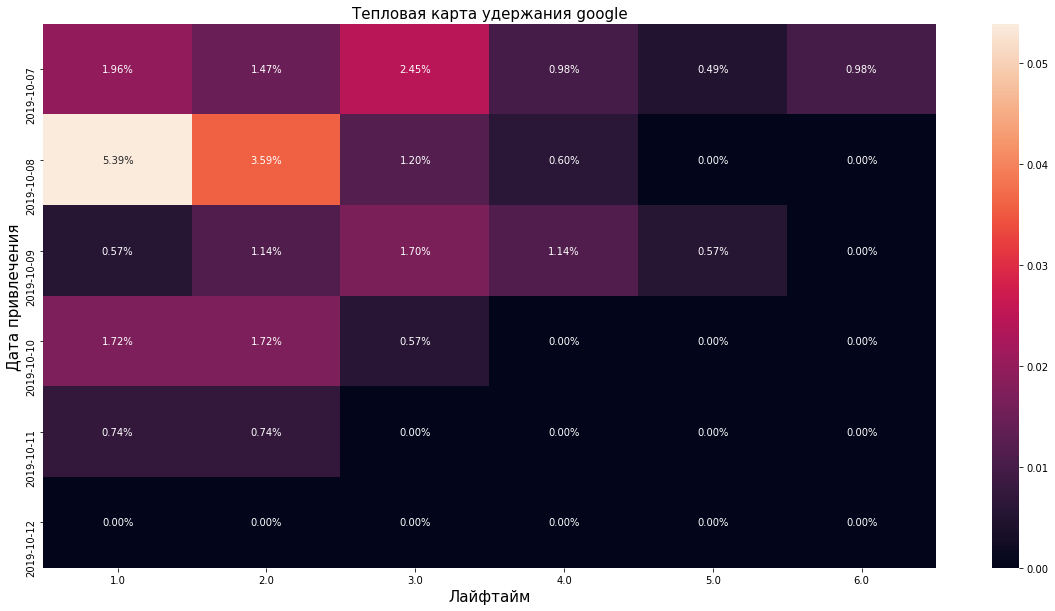

In [110]:
plt.figure(figsize=(20, 10))  # задаём размер графика
sns.heatmap(retention_b.drop(columns = [0, 'cohort_size']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.xlabel('Лайфтайм', size=15)
plt.ylabel('Дата привлечения', size=15)
plt.title('Тепловая карта удержания google', size=15)  # название графика
plt.show() 

In [111]:
c = source_user.query('source == "other"')

In [112]:
retention_raw_c, retention_c = get_retention(
    profiles, c, datetime(2019,10,18).date(), 7
)

retention_c

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0
dt,,,,,,,,
2019-10-07,204,0.254902,0.019608,0.029412,0.009804,0.009804,0.014706,0.009804
2019-10-08,167,0.293413,0.035928,0.035928,0.023952,0.017964,0.029940,0.000000
2019-10-09,176,0.238636,0.017045,0.011364,0.000000,0.017045,0.000000,0.000000
2019-10-10,174,0.316092,0.028736,0.022989,0.011494,0.000000,0.000000,0.000000
2019-10-11,136,0.198529,0.022059,0.022059,0.000000,0.000000,0.000000,0.000000
2019-10-12,125,0.240000,0.032000,0.000000,0.000000,0.000000,0.000000,0.000000


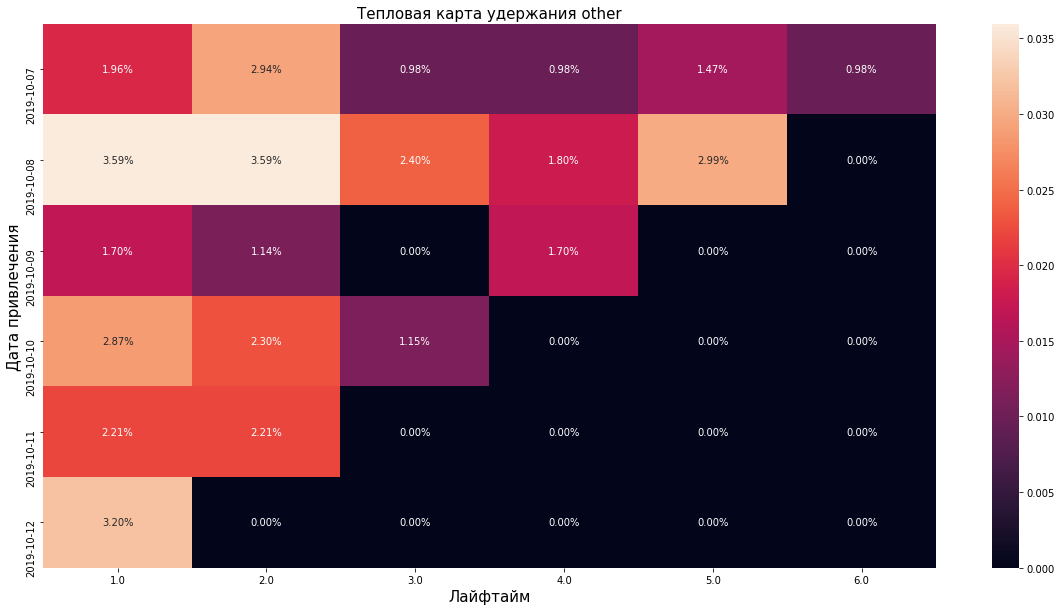

In [113]:
plt.figure(figsize=(20, 10))  # задаём размер графика
sns.heatmap(retention_c.drop(columns = [0, 'cohort_size']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.xlabel('Лайфтайм', size=15)
plt.ylabel('Дата привлечения', size=15)
plt.title('Тепловая карта удержания other', size=15)  # название графика
plt.show() 

***ВЫВОД: Наибольший процент возврата демонстрируют пользователи из источника Yandex.***

4.2 Пользователи какой группы часто делают целевое событие (show_contacts)? Рассчитать конверсию в целевое действие.

In [114]:
conv_y = (a.query('event_name == "contacts_show"')['userId'].nunique()/a.userId.nunique()*100)
print('Конверсия в целевое действие составляет:', conv_y, '%')

Конверсия в целевое действие составляет: 19.2090395480226 %


In [115]:
conv_g = (b.query('event_name == "contacts_show"')['userId'].nunique()/b.userId.nunique()*100)
print('Конверсия в целевое действие составляет:', conv_g, '%')

Конверсия в целевое действие составляет: 15.0 %


In [116]:
conv_o = (c.query('event_name == "contacts_show"')['userId'].nunique()/c.userId.nunique()*100)
print('Конверсия в целевое действие составляет:', conv_o, '%')

Конверсия в целевое действие составляет: 11.0 %


***ВЫВОД: Наибольший процент коверсии 19,2% у пользователей установивших приложение из источника Yandex, далее конверсия 15% у пользователей из источника Google, %  конверсии пользователей  из источника Other 11 %. Можно сделать вывод, что наиболее качественные пользователи устанавливают приложение из источника Yandex.***

***5. ПРОВЕРКА СТАТИСТИЧЕСКИХ ГИПОТЕЗ***

5.1 Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

***Проверим выгрузки на пересечение данных.***

In [117]:
filteredUsers = a.merge(b, on='userId', how='outer') #объединим две таблицы с источниками, для обнаружения пересечений по userId
filteredUsers

,event_time_x,event_name_x,userId,session_id_x,duration_x,hour_x,source_x,event_time_y,event_name_y,session_id_y,duration_y,hour_y,source_y
0,2019-10-11 11:22:54.442841,contacts_show,005fbea5-2678-406f-88a6-fbe9787e2268,44.0,0 days 00:02:50.674242,11.0,yandex,NaT,NaN,NaN,NaT,NaN,NaN
1,2019-10-11 11:23:00.152471,contacts_show,005fbea5-2678-406f-88a6-fbe9787e2268,44.0,0 days 00:07:14.442770,11.0,yandex,NaT,NaN,NaN,NaT,NaN,NaN
2,2019-10-11 11:23:11.379247,contacts_show,005fbea5-2678-406f-88a6-fbe9787e2268,44.0,0 days 00:05:05.122843,11.0,yandex,NaT,NaN,NaN,NaT,NaN,NaN
3,2019-10-11 11:29:10.270892,tips_show,005fbea5-2678-406f-88a6-fbe9787e2268,45.0,0 days 00:05:55.060398,11.0,yandex,NaT,NaN,NaN,NaT,NaN,NaN
4,2019-10-08 21:26:09.242929,photos_show,006a32d4-ee10-40dc-b237-11e0fde81cbc,47.0,0 days 00:06:45.314315,21.0,yandex,NaT,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,NaT,NaN,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,NaN,NaT,NaN,NaN,2019-10-12 01:07:11.782372,tips_show,16317.0,0 days 00:02:50.690941,1.0,google
7244,NaT,NaN,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,NaN,NaT,NaN,NaN,2019-10-12 01:07:53.959366,map,16317.0,0 days 00:01:45.075992,1.0,google
7245,NaT,NaN,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,NaN,NaT,NaN,NaN,2019-10-12 01:08:03.825098,tips_show,16317.0,0 days 00:05:57.907389,1.0,google
7246,NaT,NaN,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,NaN,NaT,NaN,NaN,2019-10-12 01:08:49.357548,map,16317.0,0 days 00:03:45.934813,1.0,google


In [118]:
userIdDel = filteredUsers.query('source_x == "yandex" and source_y == "google"')
userIdDel #проверили пересечение пользователей в двух выгрузках

,event_time_x,event_name_x,userId,session_id_x,duration_x,hour_x,source_x,event_time_y,event_name_y,session_id_y,duration_y,hour_y,source_y


***ВЫВОД: Пересечения не найдены.***

***Можно приступать к Z-тесту. Сформулируем нулевую и альтернативную гипотезы.***

***Нулевая гипотеза: Конверсия пользователей в просмотры контактов, установивших приложение из источника Yandex не имеет статистической разницы от конверсии пользвателей из Google.***

***Альтернативная гипотеза: Конверсия пользователей в просмотры контактов, установивших приложение из источника Yandex имеет статистическую разницу от конверсии пользвателей из Google.***

In [119]:
users_by_source = source_user.groupby('source')['userId'].agg('nunique').to_frame().reset_index()
users_by_source

,source,userId
0,google,280
1,other,300
2,yandex,531


In [120]:
successes_Y = a.query('event_name == "contacts_show"')['userId'].nunique()
successes_Y #пользователи совершившие целевое действие из источника Yandex

102

In [121]:
successes_G = b.query('event_name == "contacts_show"')['userId'].nunique()
successes_G #пользователи совершившие целевое действие из источника Google

42

In [122]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([successes_Y, successes_G])
trials = np.array([users_by_source.userId[2], users_by_source.userId[0]])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

print(successes[0], successes[1], trials[0], trials[1])

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

102 42 531 280
p-значение:  0.13587326116821785
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


***ВЫВОД: Исходя из проведенного z - теста можно сделать вывод, что конверсия пользователей в просмотры контактов, установивших приложение из источника Yandex не имеет статистической разницы от конверсии пользователей из Google.***

5.2 Сформулируйте собственную гипотезу. Дополните её нулевой и альтернативной гипотезами. Проведите статистический тест.

***Нулевая гипотеза: Пользователи, установившие приложение в будние и выходные дни не имеют статистической разницы в показателе конверсии в просмотры контактов.***

***Альтерантивная гипотеза: Конверсия в обеих группах (будние и выходные дни)  имеет статистическую разницу.***

In [123]:
profiles['weekday'] = profiles['first_ts'].dt.weekday #добавим столбец в профили пользователей с днем установки приложения, где понедельник - 0, воскресенье - 6

In [124]:
profiles_day_off = profiles.query ('weekday == 5 or weekday == 6')
profiles_day_off
#срез пользователей установивших приложение в выходной день

,userId,first_ts,dt,month,weekday
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,2019-10-19,2019-10-01,5
5,00554293-7e00-4122-b898-4e892c4a7c53,2019-10-27 12:32:28.005179,2019-10-27,2019-10-01,6
9,006f6ced-225b-4f9c-9f17-23404bc6835f,2019-10-13 10:21:52.569346,2019-10-13,2019-10-01,6
10,00753c79-ea81-4456-acd0-a47a23ca2fb9,2019-10-20 14:57:06.080501,2019-10-20,2019-10-01,6
12,009c0f37-8556-4c72-a007-100e28a37373,2019-10-20 02:05:28.051571,2019-10-20,2019-10-01,6
...,...,...,...,...,...
4272,fe3d5753-c633-4398-b3a8-b584c4d266b2,2019-10-27 20:23:50.483361,2019-10-27,2019-10-01,6
4277,fe92fa6c-7eef-484f-b31b-fa0db4e4d895,2019-10-13 18:02:11.003357,2019-10-13,2019-10-01,6
4282,fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5,2019-10-26 11:43:11.921954,2019-10-26,2019-10-01,5
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27.414960,2019-10-13,2019-10-01,6


In [125]:
X = profiles_day_off['userId'].count()
X 

1086

In [126]:
profiles_weekday = profiles.query ('weekday != 5 and weekday != 6')
profiles_weekday
 #срез пользователей установивших приложение в будний день

,userId,first_ts,dt,month,weekday
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,2019-10-01,0
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,2019-11-01,2019-11-01,4
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,2019-10-18,2019-10-01,4
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,2019-10-25,2019-10-01,4
6,005fbea5-2678-406f-88a6-fbe9787e2268,2019-10-11 11:22:54.442841,2019-10-11,2019-10-01,4
...,...,...,...,...,...
4286,ff5c152c-bd63-4797-8fa2-29987199e76d,2019-10-17 12:25:13.794761,2019-10-17,2019-10-01,3
4287,ff82c7c7-16d6-44b1-833b-a217747b0b02,2019-10-15 23:41:07.647658,2019-10-15,2019-10-01,1
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49.997044,2019-10-07,2019-10-01,0
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35.199237,2019-10-23,2019-10-01,2


In [127]:
Y = profiles_weekday['userId'].count()
Y

3207

***Проверим выгрузки на пересечения***

In [128]:
filteredUsers = profiles_day_off.merge(profiles_weekday, on = 'userId', how = 'outer') #объединим две таблицы, для обнаружения пересечений по userId
filteredUsers

,userId,first_ts_x,dt_x,month_x,weekday_x,first_ts_y,dt_y,month_y,weekday_y
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,2019-10-19,2019-10-01,5.0,NaT,NaN,NaT,NaN
1,00554293-7e00-4122-b898-4e892c4a7c53,2019-10-27 12:32:28.005179,2019-10-27,2019-10-01,6.0,NaT,NaN,NaT,NaN
2,006f6ced-225b-4f9c-9f17-23404bc6835f,2019-10-13 10:21:52.569346,2019-10-13,2019-10-01,6.0,NaT,NaN,NaT,NaN
3,00753c79-ea81-4456-acd0-a47a23ca2fb9,2019-10-20 14:57:06.080501,2019-10-20,2019-10-01,6.0,NaT,NaN,NaT,NaN
4,009c0f37-8556-4c72-a007-100e28a37373,2019-10-20 02:05:28.051571,2019-10-20,2019-10-01,6.0,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...
4288,ff5c152c-bd63-4797-8fa2-29987199e76d,NaT,NaN,NaT,NaN,2019-10-17 12:25:13.794761,2019-10-17,2019-10-01,3.0
4289,ff82c7c7-16d6-44b1-833b-a217747b0b02,NaT,NaN,NaT,NaN,2019-10-15 23:41:07.647658,2019-10-15,2019-10-01,1.0
4290,ffc01466-fdb1-4460-ae94-e800f52eb136,NaT,NaN,NaT,NaN,2019-10-07 20:32:49.997044,2019-10-07,2019-10-01,0.0
4291,ffcf50d9-293c-4254-8243-4890b030b238,NaT,NaN,NaT,NaN,2019-10-23 11:51:35.199237,2019-10-23,2019-10-01,2.0


In [129]:
userIdDel = filteredUsers.query('weekday_x >=5 and weekday_y <=4')
userIdDel #проверили пересечение пользователей в двух выгрузках

,userId,first_ts_x,dt_x,month_x,weekday_x,first_ts_y,dt_y,month_y,weekday_y


***ВЫВОД: Пересечения не обнаружены.***

In [130]:
successes_W = profiles_weekday.merge(new_data, on = 'userId', how = 'left')
w = successes_W.query('event_name == "contacts_show"')
s_w = w.groupby('weekday')['userId'].agg('nunique').sum()

In [131]:
successes_D = profiles_day_off.merge(new_data, on = 'userId', how = 'left')
d = successes_D.query('event_name == "contacts_show"')
s_d = d.groupby('weekday')['userId'].agg('nunique').sum()

In [132]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([s_w, s_d])
trials = np.array([Y, X])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.6240331709426399
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


***ВЫВОД: Пользователи, установившие приложение в будние и выходные дни не имеют статистическую разницу в показателях конверсии.***

***ИТОГОВЫЙ ВЫВОД:  После проведенного исследования можно следать следующие выводы,***

Наибольший и длительный % возврата демонстрируют пользователи привлеченные 2019-10-12 и 2019-10-08. Также стоит отметить, что на 7 лайфтайм % RR у пользователей привлеченых 2019-10-21 и 2019-10-12 самый высокий. % возврата пользователей начинает снижаться с 8 лайфтайма.

Среднее время сессии  составило 6 минут 18 секунд, в ходе исследования было установлено, что большая часть нулевых сессий относится к типу события tips_show (показать подсказку), что не всегда является актуальным для пользователя. Из исследования были исключены сессии менее 30 секунд и очень длительные сессии более 30 минут.

Конверсия в целевое действие (contacts_show просмотр контактов) составила порядка 15,9 %, что говорит о высоком уровне конверсии пользователей в целом.

Далее была произведена сегментация пользователей в разрезе источников привлечение и наивысший уровень RR  показали пользователи привлеченные из источника Yandex, что говорит имеено эти пользователи готовы чаще возвращаться в приложение.

В разрезе источников, пользователи из Yandex имеют наибольший процент коверсии 19,2% в целевое действие (show_contacts) что свидетельствет о высоком качестве пользователей привлеченных из данного источника.Далее конверсия 15% у пользователей из источника Google, %  конверсии пользователей  из источника Other 11 %, что также является высоким уровнем конверсии. 

В разрезе времени наибольшее количество сессий наблюдается в период с 10, 13 и 19-20, смею предположить, что именно в это время (дорога на работу, обед и дорога домой) по этой причине наблюдается повышенная активность сессий, наименьшая активность ночью (время сна), рост количества сессий наблюдается с 7-8 утра время пробуждения.

Также в ходе исследования был проведен статистический тест в разрезе двух групп пользователей из источников Yandex и Google, по результатам тестирования нет оснований предполагать, что пользователи из двух групп демонстрируют разную конверсию в целевое действие.

Далее был проведен Z-test на предмет различия пользователей установивших приложение в будние и выходные дни, по результаттам тестирования нет оснований считать доли разными, что говорит о том что показатели конверсии в обеих группах статистически одинаковы.

Из рекомендаций продолжить работу с источниками Yandex и Google, адаптировать приложение под оба источника, так как  пользователи из указанных источников приходят качественные и демонстрируют высокий показатель конверсии в целевое действие и % возврата.